### Import Packages

In [29]:
%config InlineBackend.figure_formats = ['svg']

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from scipy import signal
from sklearn.linear_model import LinearRegression

import sys

### Import Datasets

In [30]:
quiet = pd.read_csv("spiro-quiet.csv")
deep = pd.read_csv("spiro-deep.csv")
run = pd.read_csv("spiro-run.csv")

dataset = [quiet, deep, run]
dataset_names = ["quiet", "deep", "run"]
run

Run 1: Time (s)  Run 1: Flow Rate (L/s)  Run 1: Volume (L)  \
0             0.000000               -0.116638           0.000000   
1             0.016667               -0.155319           0.002266   
2             0.033334               -0.184479           0.005098   
3             0.050001               -0.223160           0.008495   
4             0.066668               -0.232681           0.012294   
...                ...                     ...                ...   
17995       299.922665               -0.329681          -0.933501   
17996       299.939332               -0.358841          -0.927763   
17997       299.955999               -0.378479          -0.921619   
17998       299.972666               -0.407043          -0.915073   
17999       299.989333               -0.426682          -0.908125   

       Run 2: Time (s)  Run 2: Flow Rate (L/s)  Run 2: Volume (L)  \
0             0.000000               -0.002380           0.000000   
1             0.016667                0.007736          -0.000045   
2             0.033334                0.007736          -0.000174   
3             0.050001               -0.002380          -0.000218   
4             0.066668                0.007736          -0.000263   
...                ...                     ...                ...   
17995              NaN                     NaN                NaN   
17996              NaN                     NaN                NaN   
17997              NaN                     NaN                NaN   
17998              NaN                     NaN                NaN   
17999              NaN                     NaN                NaN   

       Run 3: Time (s)  Run 3: Flow Rate (L/s)  Run 3: Volume (L)  
0             0.000000               -0.184478          -0.000000  
1             0.016667               -0.213638           0.003318  
2             0.033334               -0.223754           0.006963  
3             0.050001               -0.213638           0.010608  
4             0.066668               -0.174957           0.013846  
...                ...                     ...                ...  
17995              NaN                     NaN                NaN  
17996              NaN                     NaN                NaN  
17997              NaN                     NaN                NaN  
17998              NaN                     NaN                NaN  
17999              NaN                     NaN                NaN  

[18000 rows x 9 columns]

### Create Graphs

#### Define Function for Graphing

In [66]:
def get_name(variable):
    return f'{variable=}'.split('=')[0]



def plot(dataset, run_count, names=["quiet", "deep", "Spirometry Run"], size=0.5):
    # plt.figure(run_count)
    # Plot 1

    plt.subplot(211)
    plt.title("Time(s) vs. Lung Volume(L)")
    plt.xlabel("Time (s)")
    plt.ylabel("Lung Volume (L)")
    plt.scatter(
        dataset[f'Run {run_count}: Time (s)'], 
        dataset[f'Run {run_count}: Volume (L)'], 
        label=names[run_count-1],
        s=size)
    # # Plot 2
    # plt.subplot(212)
    # plt.title("Volume(L) vs. Flow Rate (L/s)")
    # plt.xlabel("Volume (L)")
    # plt.ylabel("Flow Rate (L/s)")
    # plt.plot(dataset[f'Run {run_count}: Volume (L)'], dataset[f"Run {run_count}: Flow Rate (L/s)"], label=names[run_count-1])

    plt.legend()


def segmenting_in_plot(dataset, start_time = 30, time_length=180, run_count=1):
    vars(sys.modules[__name__])[f"{dataset}_segmented"] = dataset[
        (dataset[f'Run {run_count}: Time (s)'] < (start_time + time_length)) 
        & 
        (dataset[f'Run {run_count}: Time (s)'] > start_time)]

def segmenting(dataset, start_time = 30, time_length=180, run_count=1):
    return dataset[
        (dataset[f'Run {run_count}: Time (s)'] < (start_time + time_length)) 
        & 
        (dataset[f'Run {run_count}: Time (s)'] > start_time)]

#### Graph all graphs

In [32]:
for i in range(len(dataset)):
    segmenting_in_plot(dataset[i], start_time=0, time_length=180, run_count=i+1)
    plot(vars(sys.modules[__name__])[f"{dataset[i]}_segmented"], run_count=i+1)
    

In [33]:
# Segmenting Data
segmented_quiet = segmenting(quiet, start_time=0, time_length=180)
segmented_deep = segmenting(deep, start_time=0, time_length=180, run_count=1)
segmented_run = segmenting(run, start_time=0, time_length=20, run_count=2)

fig, axs = plt.subplots(2, 2)
plot(segmented_run, run_count=3, names=["Running"]*3)
plot(segmented_quiet, run_count=1, names=["quiet"]*3)
plot(segmented_deep,run_count=2, names=["deep"]*3)

/var/folders/0y/bnh8rvg11rd93vjf0f787p980000gn/T/ipykernel_85720/195896784.py:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(211)


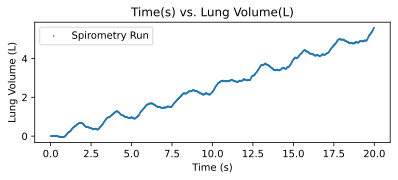

In [34]:
plot(segmented_run, run_count=3, names=["Spirometry Run"]*3)

#### Graph Running and Rotated Sine Wave

##### rotate_matrix function

In [35]:
import math
# Rotation matrix function
def rotate_matrix (x, y, angle, x_shift=0, y_shift=0, units="DEGREES"):
    """
    Rotates a point in the xy-plane counterclockwise through an angle about the origin
    https://en.wikipedia.org/wiki/Rotation_matrix
    :param x: x coordinate
    :param y: y coordinate
    :param x_shift: x-axis shift from origin (0, 0)
    :param y_shift: y-axis shift from origin (0, 0)
    :param angle: The rotation angle in degrees
    :param units: DEGREES (default) or RADIANS
    :return: Tuple of rotated x and y
    """

    # Shift to origin (0,0)
    x = x - x_shift
    y = y - y_shift

    # Convert degrees to radians
    if units == "DEGREES":
        angle = math.radians(angle)

    # Rotation matrix multiplication to get rotated x & y
    xr = (x * math.cos(angle)) - (y * math.sin(angle)) + x_shift
    yr = (x * math.sin(angle)) + (y * math.cos(angle)) + y_shift

    return xr, yr
# Rotation matrix function
def negative_rotate_matrix (x, y, angle, x_shift=0, y_shift=0, units="DEGREES"):
    """
    Rotates a point in the xy-plane counterclockwise through an angle about the origin
    https://en.wikipedia.org/wiki/Rotation_matrix
    :param x: x coordinate
    :param y: y coordinate
    :param x_shift: x-axis shift from origin (0, 0)
    :param y_shift: y-axis shift from origin (0, 0)
    :param angle: The rotation angle in degrees
    :param units: DEGREES (default) or RADIANS
    :return: Tuple of rotated x and y
    """

    # Shift to origin (0,0)
    x = x - x_shift
    y = y - y_shift

    # Convert degrees to radians
    if units == "DEGREES":
        angle = math.radians(angle)

    # Rotation matrix multiplication to get rotated x & y
    xr = (x * math.cos(angle)) + (y * math.sin(angle)) + x_shift
    yr = -(x * math.sin(angle)) + (y * math.cos(angle)) + y_shift

    return xr, yr

##### Sine Wave + Rotated + Running

In [36]:
# Plot a sine wave
x = np.arange(0, 20, 0.01)
# Amplitude of the sine wave is sine of a variable like time
y = np.sin(x)
xr, yr = rotate_matrix(x, y, angle=12)

fig = plt.figure(figsize=(10, 9))
plot(segmented_run, run_count=3, names=["Spirometry data when running in place"]*3)
# plt.plot(x, y, label="Sine Wave y = sin(x)")
# plt.plot(xr, yr, label="Rotated y = sin(x) by 12 degrees")
plt.legend()

In [37]:
max_x = np.arange(0, 20, 0.01)
max_y = np.ones(2000)
min_y = -(max_y)

max_xr, max_yr = rotate_matrix(max_x, max_y, angle=12)
min_xr, min_yr = rotate_matrix(max_x, min_y, angle=12)


fig = plt.figure(figsize=(12, 6))

plt.title("Time(s) vs. Lung Volume(L)")
plt.xlabel("Time (s)")
plt.ylabel("Lung Volume (L)")

plt.plot(x, y, label="Sine Wave y = sin(x)")
plt.plot(max_x, max_y, label="y=1", linestyle="dashed", color="#1f77b4")
plt.plot(max_x, min_y, label="y=-1", linestyle="dashed", color="#1f77b4")
plt.plot(xr, yr, label="y = sin(x) after counter-clockwise 12-degree rotation")
plt.plot(max_xr, max_yr, label="Maximum after counter-clockwise 12-degree rotation", linestyle="dashed", color="orange")
plt.plot(min_xr, min_yr, label="Maximum after counter-clockwise 12-degree rotation", linestyle="dashed", color="orange")
plt.legend()

In [38]:
segmented_run.to_csv("segmented_run.csv")
print(segmented_run.columns)
segmented_run_X = segmented_run['Run 3: Time (s)']
segmented_run_Y = segmented_run['Run 3: Volume (L)']

Index(['Run 1: Time (s)', 'Run 1: Flow Rate (L/s)', 'Run 1: Volume (L)',
       'Run 2: Time (s)', 'Run 2: Flow Rate (L/s)', 'Run 2: Volume (L)',
       'Run 3: Time (s)', 'Run 3: Flow Rate (L/s)', 'Run 3: Volume (L)'],
      dtype='object')


In [39]:
#### Find Local Maximum and Minimum

In [40]:

# find peaks
peak_indexes = signal.argrelextrema(segmented_run_Y.values, np.greater, order=42)
peak_indexes = peak_indexes[0]

peak_x = segmented_run['Run 3: Time (s)'][peak_indexes]
peak_x = peak_x.append(pd.Series(segmented_run['Run 3: Time (s)'].iat[-1]))
peak_x.drop(index=peak_x.index[0], axis=0, inplace=True)
peak_y = segmented_run_Y[peak_indexes]
peak_y = peak_y.append(pd.Series(segmented_run['Run 3: Volume (L)'].iat[-1]))
peak_y.drop(index=peak_y.index[0], axis=0, inplace=True)


# find valleys
valley_indexes = signal.argrelextrema(segmented_run_Y.values, np.less, order=27)
valley_indexes = valley_indexes[0]

valley_x = segmented_run['Run 3: Time (s)'][valley_indexes]
valley_y = segmented_run_Y[valley_indexes]


plot(segmented_run, run_count=3)
plt.scatter(peak_x, peak_y, s=8, label="Local Maximum", color="C3")
plt.scatter(valley_x, valley_y, s=8, label="Local Minimum", color="C1")
plt.legend()

/var/folders/0y/bnh8rvg11rd93vjf0f787p980000gn/T/ipykernel_85720/970570425.py:6: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  peak_x = peak_x.append(pd.Series(segmented_run['Run 3: Time (s)'].iat[-1]))
/var/folders/0y/bnh8rvg11rd93vjf0f787p980000gn/T/ipykernel_85720/970570425.py:9: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  peak_y = peak_y.append(pd.Series(segmented_run['Run 3: Volume (L)'].iat[-1]))


In [41]:
peak_x_reshaped = peak_x.to_numpy().reshape(-1,1)
peak_y_reshaped = peak_y.to_numpy().reshape(-1,1)
print(peak_x_reshaped)
print(peak_y_reshaped)
reg = LinearRegression().fit(peak_x_reshaped, peak_y_reshaped)
print(f"The score = {reg.score(peak_x_reshaped, peak_y_reshaped)}")
print(f"Coefficient: {reg.coef_[0][0]}")
print(f"Intercept: {reg.intercept_[0]}")

fig = plt.figure(figsize=(12, 8))
predicted_peak_y_reshaped = reg.predict(peak_x_reshaped)
line_position_vector = [peak_x_reshaped[0][0], predicted_peak_y_reshaped[0][0]]
line_direction_vector = [peak_x_reshaped[-1][0] - peak_x_reshaped[0][0], predicted_peak_y_reshaped[-1][0] - predicted_peak_y_reshaped[0][0]]

straight_line_position_vector = line_position_vector

straight_line_direction_vector = [peak_x_reshaped[-1][0] - peak_x_reshaped[0][0], predicted_peak_y_reshaped[0][0] - predicted_peak_y_reshaped[0][0]]

plot(segmented_run, run_count=3)
plt.scatter(peak_x_reshaped, predicted_peak_y_reshaped, label="Maximum Points")
plt.plot(peak_x_reshaped, predicted_peak_y_reshaped, label=f"Linear Regression Model for Maximum Points. \n y = {reg.coef_[0][0]}x+{reg.intercept_[0]}")
plt.scatter([peak_x_reshaped[0][0], peak_x_reshaped[-1][0]], [peak_y_reshaped[0][0], peak_y_reshaped[0][0]], color = 'r', linestyle = '-')
# plt.plot([peak_x_reshaped[0][0], peak_x_reshaped[-1][0]], [peak_y_reshaped[0][0], peak_y_reshaped[0][0]], color = 'r', linestyle = '-')
plt.quiver(*line_position_vector, *line_direction_vector, angles='xy', scale_units='xy', scale=1, color='#4472C4')
plt.quiver(*straight_line_position_vector, *straight_line_direction_vector, angles='xy', scale_units='xy', scale=1, color='#ee9a00')

plt.legend()

[[ 1.816703]
 [ 4.066748]
 [ 6.150123]
 [ 8.800176]
 [13.233598]
 [15.683647]
 [17.817023]
 [19.983733]]
[[0.67481322]
 [1.2795874 ]
 [1.68766467]
 [2.36547786]
 [3.73641367]
 [4.43441587]
 [4.99533584]
 [5.59319196]]
The score = 0.9981940628916826
Coefficient: 0.2742519919675852
Intercept: 0.09445729567287264


In [42]:
print(f"Direction Vector: {line_direction_vector}")
print(f"Position Vector: {line_position_vector}")

Direction Vector: [18.16703, 4.9823441656348795]
Position Vector: [1.816703, 0.5926917122363606]


In [43]:
print(line_position_vector)
print(line_direction_vector)

print(straight_line_position_vector)
print(straight_line_direction_vector)

[1.816703, 0.5926917122363606]
[18.16703, 4.9823441656348795]
[1.816703, 0.5926917122363606]
[18.16703, 0.0]


Calculating the Angle with Cos(theta)

In [44]:
import math

line_norm = np.linalg.norm(np.array(line_position_vector) + np.array(line_direction_vector))
straight_line_norm = np.linalg.norm(np.array(straight_line_position_vector) + np.array(straight_line_direction_vector))
theta = math.acos(straight_line_norm/line_norm)

sr_xr, sr_yr = negative_rotate_matrix(x=segmented_run_X,y=segmented_run_Y, angle=(theta), units="RADIAN")
srl_xr, srl_yr = negative_rotate_matrix(x=peak_x_reshaped,y=predicted_peak_y_reshaped, angle=(theta), units="RADIAN")

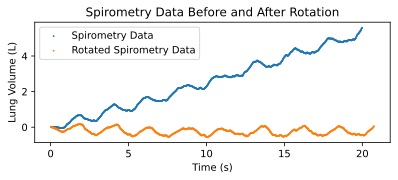

In [69]:
plot(segmented_run, run_count=3, names=["Spirometry Data"]*3, size=0.8)
plt.title("Spirometry Data Before and After Rotation")
plt.scatter(sr_xr, sr_yr, label="Rotated Spirometry Data", s=0.8)
# plt.plot(srl_xr, srl_yr, label="Line")
plt.legend()

In [46]:
sr_xr

1        0.016948
2        0.033982
3        0.051017
4        0.067944
5        0.084568
          ...    
1195    20.654795
1196    20.679402
1197    20.704029
1198    20.728248
1199    20.751647
Length: 1199, dtype: float64

y = -0.002810082242639184x + 0.09109399222865036


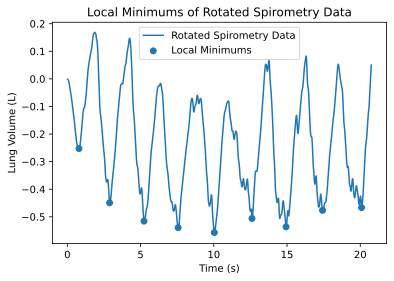

In [62]:
srl_xr
srl_yr
reg_line = LinearRegression().fit(srl_xr, srl_yr)
print(f"y = {reg_line.coef_[0][0]}x + {reg_line.intercept_[0]}")


# find valleys
valley_indexes = signal.argrelextrema(sr_yr.values, np.less, order=30)
valley_indexes = valley_indexes[0]

valley_x = sr_xr[valley_indexes]
valley_y = sr_yr[valley_indexes]

fig = plt.figure(figsize=(6, 4))
plt.title("Local Minimums of Rotated Spirometry Data")
plt.xlabel("Time (s)")
plt.ylabel("Lung Volume (L)")
plt.plot(sr_xr, sr_yr, label="Rotated Spirometry Data")
plt.scatter(valley_x, valley_y, label="Local Minimums")
plt.legend()

In [48]:
from scipy.optimize import curve_fit
def func(x, a, b, c):
    return -a * np.cos(-b * x) + c


popt, pcov = curve_fit(xdata=sr_xr, ydata=sr_yr, f=func, bounds=([0.3, 2.7, -0.2], [2., 2.71, np.Inf]))


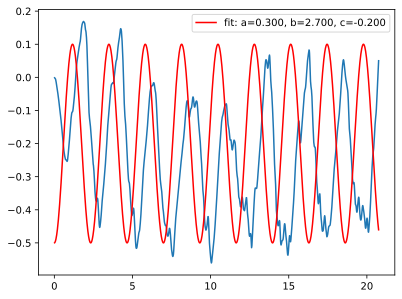

In [49]:
plt.plot(sr_xr, sr_yr)
plt.plot(sr_xr, func(sr_xr, *popt), 'r-',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
plt.legend()


### First Half

In [81]:
# First Half
plt.plot(sr_xr, sr_yr, label="Rotated Spirometry Data")
first_four_rotated_peak_x_reshaped, first_four_rotated_peak_y_reshaped = negative_rotate_matrix(x=peak_x_reshaped[:4],y=peak_y_reshaped[:4], angle=(theta), units="RADIAN")
reg = LinearRegression().fit(first_four_rotated_peak_x_reshaped, first_four_rotated_peak_y_reshaped)
predicted_first_four_rotated_peak_y_reshaped = reg.predict(first_four_rotated_peak_x_reshaped)
plt.scatter(first_four_rotated_peak_x_reshaped, first_four_rotated_peak_y_reshaped)
plt.plot(first_four_rotated_peak_x_reshaped, predicted_first_four_rotated_peak_y_reshaped)

position_vector1 = [first_four_rotated_peak_x_reshaped[0][0], predicted_first_four_rotated_peak_y_reshaped[0][0]]
direction_vector1 = [first_four_rotated_peak_x_reshaped[-1][0]-first_four_rotated_peak_x_reshaped[0][0],predicted_first_four_rotated_peak_y_reshaped[-1][0]-predicted_first_four_rotated_peak_y_reshaped[0][0]]
plt.quiver(*position_vector1, *direction_vector1, angles='xy', scale_units='xy', scale=1)

position_vector2 = position_vector1
direction_vector2 = [first_four_rotated_peak_x_reshaped[-1][0]-first_four_rotated_peak_x_reshaped[0][0],0]
plt.quiver(*position_vector2, *direction_vector2, angles='xy', scale_units='xy', scale=1)

In [76]:
line_norm = np.linalg.norm(np.array(direction_vector1))
straight_line_norm = np.linalg.norm(np.array(direction_vector2))


theta2 = math.acos(straight_line_norm/line_norm)

srff_xrr, srff_yrr = rotate_matrix(x=sr_xr,y=sr_yr, angle=(theta2), units="RADIAN")
srffour_xr, srffour_yr = rotate_matrix(x=first_four_rotated_peak_x_reshaped,y=predicted_first_four_rotated_peak_y_reshaped, angle=(theta2), units="RADIAN")

In [79]:
plt.plot(sr_xr, sr_yr)
plt.plot(srff_xrr, srff_yrr)

### Second Half

In [52]:
# Second Half
# last_four_rotated_peak_x_reshaped, last_four_rotated_peak_y_reshaped = negative_rotate_matrix(x=peak_x_reshaped[4:],y=peak_y_reshaped[4:], angle=(theta), units="RADIAN")
last_four_rotated_peak_x_reshaped = peak_x_reshaped[4:]
last_four_rotated_peak_y_reshaped = peak_y_reshaped[4:]


reg = LinearRegression().fit(last_four_rotated_peak_x_reshaped, last_four_rotated_peak_y_reshaped)
predicted_last_four_rotated_peak_y_reshaped = reg.predict(last_four_rotated_peak_x_reshaped)
plt.scatter(last_four_rotated_peak_x_reshaped, last_four_rotated_peak_y_reshaped)
plt.plot(last_four_rotated_peak_x_reshaped, predicted_last_four_rotated_peak_y_reshaped)

position_vector1 = [last_four_rotated_peak_x_reshaped[0][0], predicted_last_four_rotated_peak_y_reshaped[0][0]]
direction_vector1 = [last_four_rotated_peak_x_reshaped[-1][0]-last_four_rotated_peak_x_reshaped[0][0],predicted_last_four_rotated_peak_y_reshaped[-1][0]-predicted_last_four_rotated_peak_y_reshaped[0][0]]
plt.quiver(*position_vector1, *direction_vector1, angles='xy', scale_units='xy', scale=1)

position_vector2 = [last_four_rotated_peak_x_reshaped[0][0], last_four_rotated_peak_y_reshaped[-1][0]]
direction_vector2 = [last_four_rotated_peak_x_reshaped[-1][0]-last_four_rotated_peak_x_reshaped[0][0],0]
plt.quiver(*position_vector2, *direction_vector2, angles='xy', scale_units='xy', scale=1)

line_norm = np.linalg.norm(np.array(direction_vector1))
straight_line_norm = np.linalg.norm(np.array(direction_vector2))


theta3 = math.acos(straight_line_norm/line_norm)

srlf_xrr, srlf_yrr = negative_rotate_matrix(x=sr_xr,y=sr_yr, angle=(theta3), units="RADIAN")
srlfour_xr, srlfour_yr = negative_rotate_matrix(x=last_four_rotated_peak_x_reshaped,y=predicted_last_four_rotated_peak_y_reshaped, angle=(theta3), units="RADIAN")

In [53]:
plt.scatter(sr_xr, sr_yr)
plt.scatter(srff_xrr[:588], srff_yrr[:588])
plt.scatter(srlf_xrr, srlf_yrr)

plt.scatter(srffour_xr, srffour_yr)
plt.scatter(srlfour_xr, srlfour_yr)
plt.scatter(first_four_rotated_peak_x_reshaped, first_four_rotated_peak_y_reshaped)

/var/folders/0y/bnh8rvg11rd93vjf0f787p980000gn/T/ipykernel_85720/2473461731.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.scatter(srff_xrr[:588], srff_yrr[:588])


In [54]:
# pd.DataFrame(np.column_stack((srff_xrr[:588], sr_yrr[:588]))).to_csv("first_half_rotated_rotated_data.csv")
pd.DataFrame(np.column_stack((sr_xr[588:], sr_yr[588:]))).to_csv("second_halfrotated_rotated_data.csv")


/var/folders/0y/bnh8rvg11rd93vjf0f787p980000gn/T/ipykernel_85720/3806696149.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  pd.DataFrame(np.column_stack((sr_xr[588:], sr_yr[588:]))).to_csv("second_halfrotated_rotated_data.csv")


In [55]:
def ff_fitted_func(x):
    # This function was obtained from Desmos
    return -0.3*np.sin(2.7*x)
predict_srff_yrr = np.vectorize(ff_fitted_func)(srff_xrr)

def lf_fitted_func(x):
    # This function was obtained from Desmos
    return 0.3*np.sin(2.5*(x-5.3))-0.2
predict_srlf_yrr = np.vectorize(lf_fitted_func)(srlf_xrr)


In [56]:


# First Four
srff_xrrb, predict_srff_yrrb = negative_rotate_matrix(srff_xrr, predict_srff_yrr, angle=theta2, units = "RADIANS")
srff_xrrbb, predict_srff_yrrbb = rotate_matrix(srff_xrrb, predict_srff_yrrb, angle=theta, units = "RADIANS")


# Last Four
srlf_xrrb, predict_srlf_yrrb = negative_rotate_matrix(srlf_xrr, predict_srlf_yrr, angle=theta3, units = "RADIANS")
srlf_xrrbb, predict_srlf_yrrbb = rotate_matrix(srlf_xrrb, predict_srlf_yrrb, angle=theta, units = "RADIANS")
srlf_xrrbb, predict_srlf_yrrbb = rotate_matrix(srlf_xrrbb, predict_srlf_yrrbb, angle=theta, units = "RADIANS")

# Combine the two together
combined_x, combined_y = rotate_matrix(srlf_xrrbb, (predict_srff_yrrb.abs() + predict_srlf_yrrb.abs())/2, angle=theta, units = "RADIANS")

fig = plt.figure(figsize=(12, 8))

plot(segmented_run, run_count=3)
plt.scatter(srff_xrr, srff_yrr, s=0.2, label="Rotated Spirometry Run")
plt.scatter(srff_xrr, predict_srff_yrr, s=0.2, label="Rotated fitting of the first four")
plt.scatter(srlf_xrr, predict_srlf_yrr, s=0.2, label="Rotated fitting of the last four")

plt.scatter(srff_xrrbb, predict_srff_yrrbb, s=0.2, label="First Four Rotated Back")
plt.scatter(srlf_xrrbb, predict_srlf_yrrbb, s=0.5, label="Last Four Rotated Back")
plt.scatter(srlf_xrrbb, (predict_srff_yrrb.abs() + predict_srlf_yrrb.abs())/2, s=0.2, label="Combining two absolute values")
plt.scatter(combined_x, combined_y, s=0.5, label="The two fitting combined")
plt.legend()